In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [11]:
# remove identifying features such as "ctas_official_version"
folders = ["../data/sessions-active_30-by_device/",
           "../data/sessions-active_30-canada/",
           "../data/units-active_devices-by_device/",
           "../data/units-active_devices-canada/"]

# os.getcwd()
# os.listdir("../data/sessions-active_30-by_device/")[0:5]
# for folder in folders:
#     for file in os.listdir(folder):
#         new_name = file.replace("ctas_official_version-", "")
#         os.rename(folder + file, folder + new_name)

# navigate to directory and combine all csv files
data = []
for folder in folders:
    info = pd.DataFrame()
    for file in os.listdir(folder):
        input_data = pd.read_csv(folder + file, skiprows=4)
        info = pd.concat([info, input_data], ignore_index=True)

    data.append(info)

# write combined tables to file
# data[0].to_csv("../sessions-active_30-by_device.csv", index=False)
# data[1].to_csv("../sessions-active_30-canada.csv", index=False)
# data[2].to_csv("../units-active_devices-by_device.csv", index=False)
# data[3].to_csv("../units-active_devices-canada.csv", index=False)

# combine datasets
# active_sessions = pd.merge(data[0], data[1], on="Date")
# units = pd.merge(data[2], data[3], on="Date")

# active_sessions.to_csv("../active_sessions.csv", index=False)
# units.to_csv("../units.csv", index=False)

In [3]:
data[3].head()
data[3].shape

(1491, 311)

In [4]:
a = data[3].copy()
a['World App Units'] = a.filter(like='App Units').sum(axis=1).subtract(a['Canada App Units'])
a.head()

,Date,Albania App Units,Algeria App Units,Angola App Units,Anguilla App Units,Antigua and Barbuda App Units,Argentina App Units,Armenia App Units,Australia App Units,Austria App Units,...,United Kingdom Active Devices,United States Active Devices,Uruguay Active Devices,Uzbekistan Active Devices,Venezuela Active Devices,Vietnam Active Devices,"Virgin Islands, British Active Devices",Yemen Active Devices,Zimbabwe Active Devices,World App Units
0,4/1/15,-,-,-,-,-,-,-,0.0,-,...,0.0,0.0,-,-,-,-,-,-,-,0.0
1,4/2/15,-,-,-,-,-,-,-,0.0,-,...,0.0,1.0,-,-,-,-,-,-,-,0.0
2,4/3/15,-,-,-,-,-,-,-,0.0,-,...,0.0,1.0,-,-,-,-,-,-,-,0.0
3,4/4/15,-,-,-,-,-,-,-,0.0,-,...,0.0,0.0,-,-,-,-,-,-,-,0.0
4,4/5/15,-,-,-,-,-,-,-,0.0,-,...,0.0,0.0,-,-,-,-,-,-,-,1.0


In [5]:
# add the 'app units' and 'active devices' from data[2] and data[3]
dataset = pd.DataFrame()
dataset = pd.concat([data[2], data[3]['Canada App Units']], axis=1)
# sum all countries then minus Canada = world total
dataset['World App Units'] = data[3].filter(like='App Units').sum(axis=1).subtract(data[3]['Canada App Units'])
dataset = pd.concat([dataset, data[3]['Canada Active Devices']], axis=1)
dataset['World Active Devices'] = data[3].filter(like='Active Devices').sum(axis=1).subtract(data[3]['Canada Active Devices'])
dataset.head()

,Date,Apple TV App Units,iPad App Units,iPhone App Units,iPod App Units,Apple TV Active Devices,iPad Active Devices,iPhone Active Devices,iPod Active Devices,Canada App Units,World App Units,Canada Active Devices,World Active Devices
0,4/1/15,-,1.0,3.0,0.0,-,1.0,11.0,0.0,4.0,0.0,10.0,2.0
1,4/2/15,-,0.0,0.0,0.0,-,2.0,9.0,0.0,0.0,0.0,10.0,1.0
2,4/3/15,-,0.0,3.0,0.0,-,0.0,10.0,0.0,3.0,0.0,6.0,3.0
3,4/4/15,-,0.0,3.0,0.0,-,1.0,5.0,0.0,3.0,0.0,6.0,0.0
4,4/5/15,-,0.0,2.0,0.0,-,0.0,9.0,0.0,1.0,1.0,9.0,0.0


In [6]:
data[1].head()

,Date,Albania Sessions,Algeria Sessions,Angola Sessions,Anguilla Sessions,Antigua and Barbuda Sessions,Argentina Sessions,Armenia Sessions,Australia Sessions,Austria Sessions,...,United Arab Emirates Active Last 30 Days,United Kingdom Active Last 30 Days,United States Active Last 30 Days,Uruguay Active Last 30 Days,Uzbekistan Active Last 30 Days,Venezuela Active Last 30 Days,Vietnam Active Last 30 Days,"Virgin Islands, British Active Last 30 Days",Yemen Active Last 30 Days,Zimbabwe Active Last 30 Days
0,4/1/15,-,-,-,-,-,-,-,0.0,-,...,0.0,0.0,0.0,-,-,-,-,-,-,-
1,4/2/15,-,-,-,-,-,-,-,0.0,-,...,0.0,0.0,1.0,-,-,-,-,-,-,-
2,4/3/15,-,-,-,-,-,-,-,0.0,-,...,0.0,0.0,1.0,-,-,-,-,-,-,-
3,4/4/15,-,-,-,-,-,-,-,0.0,-,...,0.0,0.0,1.0,-,-,-,-,-,-,-
4,4/5/15,-,-,-,-,-,-,-,0.0,-,...,0.0,0.0,1.0,-,-,-,-,-,-,-


In [7]:
# add the 'sessions' and 'active last 30 days' from data[0] and data[1]
dataset = pd.concat([dataset, data[0].loc[:,data[0].columns!='Date'], data[1]['Canada Sessions'], data[1]['Canada Active Last 30 Days']], axis=1)

# sum all countries then minus Canada = world total
dataset['World Sessions'] = data[1].filter(like='Sessions').sum(axis=1).subtract(data[1]['Canada Sessions'])
dataset['World Active Last 30 Days'] = data[1].filter(like='Active Last 30 Days').sum(axis=1).subtract(data[1]['Canada Active Last 30 Days'])

dataset.index = pd.to_datetime(dataset['Date'], format='%m/%d/%y')
dataset.drop(columns='Date', inplace=True)

dataset.replace('-', 0, inplace=True)

# export df
dataset.to_csv("../dataset.csv", index=False)
dataset.head()

,Apple TV App Units,iPad App Units,iPhone App Units,iPod App Units,Apple TV Active Devices,iPad Active Devices,iPhone Active Devices,iPod Active Devices,Canada App Units,World App Units,...,iPhone Sessions,iPod Sessions,Apple TV Active Last 30 Days,iPad Active Last 30 Days,iPhone Active Last 30 Days,iPod Active Last 30 Days,Canada Sessions,Canada Active Last 30 Days,World Sessions,World Active Last 30 Days
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,0,1.0,3.0,0.0,0,1.0,11.0,0.0,4.0,0.0,...,27.0,0.0,0,1.0,11.0,0.0,25.0,10.0,6.0,2.0
2015-04-02,0,0.0,0.0,0.0,0,2.0,9.0,0.0,0.0,0.0,...,28.0,0.0,0,2.0,18.0,0.0,30.0,17.0,1.0,3.0
2015-04-03,0,0.0,3.0,0.0,0,0.0,10.0,0.0,3.0,0.0,...,29.0,0.0,0,2.0,21.0,0.0,17.0,18.0,9.0,4.0
2015-04-04,0,0.0,3.0,0.0,0,1.0,5.0,0.0,3.0,0.0,...,6.0,0.0,0,3.0,26.0,0.0,7.0,24.0,0.0,4.0
2015-04-05,0,0.0,2.0,0.0,0,0.0,9.0,0.0,1.0,1.0,...,28.0,0.0,0,3.0,31.0,0.0,28.0,29.0,0.0,4.0


C:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


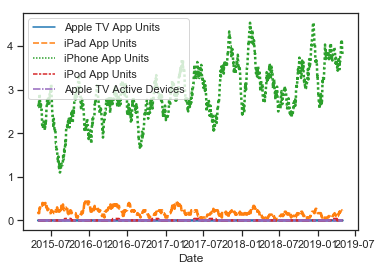

In [8]:
# plot values
# data2 = data.rolling(7).mean()
data2 = dataset.rolling(30).mean()
sns.lineplot(data=data2.iloc[:,0:5], palette="tab10", linewidth=2.5)


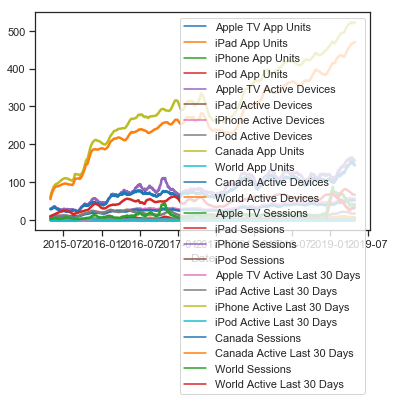

In [9]:
sns.lineplot(data=data2, palette="tab10", linewidth=2.5, dashes=False)

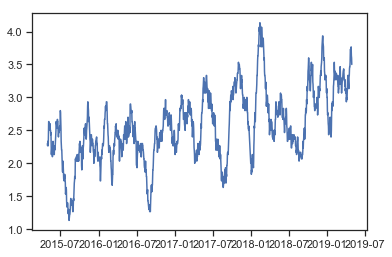

In [10]:
sns.lineplot(data=dataset['Canada App Units'].rolling(30).mean())